In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, SGDRegressor
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import math
from sklearn.preprocessing import PolynomialFeatures

In [3]:
housing=pd.read_csv("housing.csv")

In [4]:
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


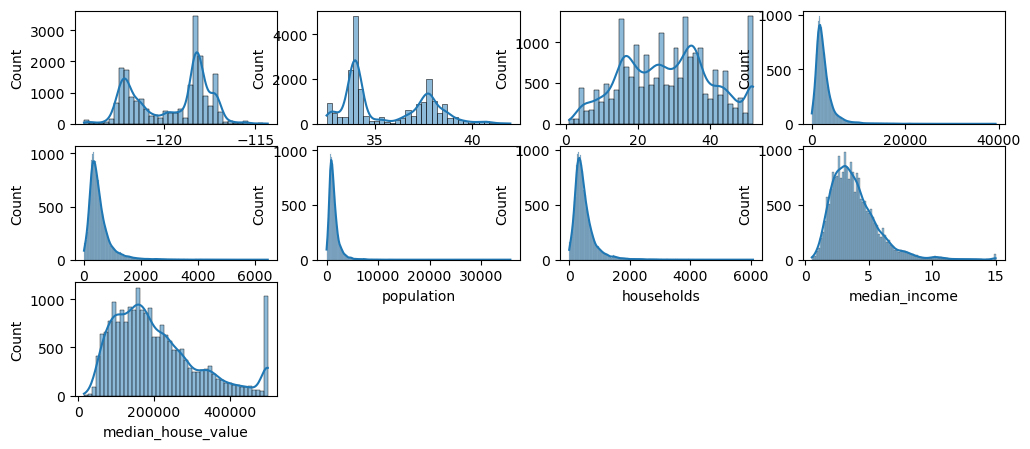

In [16]:
plt.figure(figsize=(12, 5))
no=340
for col in housing.columns:
    no+=1
    plt.subplot(no)
    sns.histplot(housing[col] , kde=True)  
    if no == 349:
        break

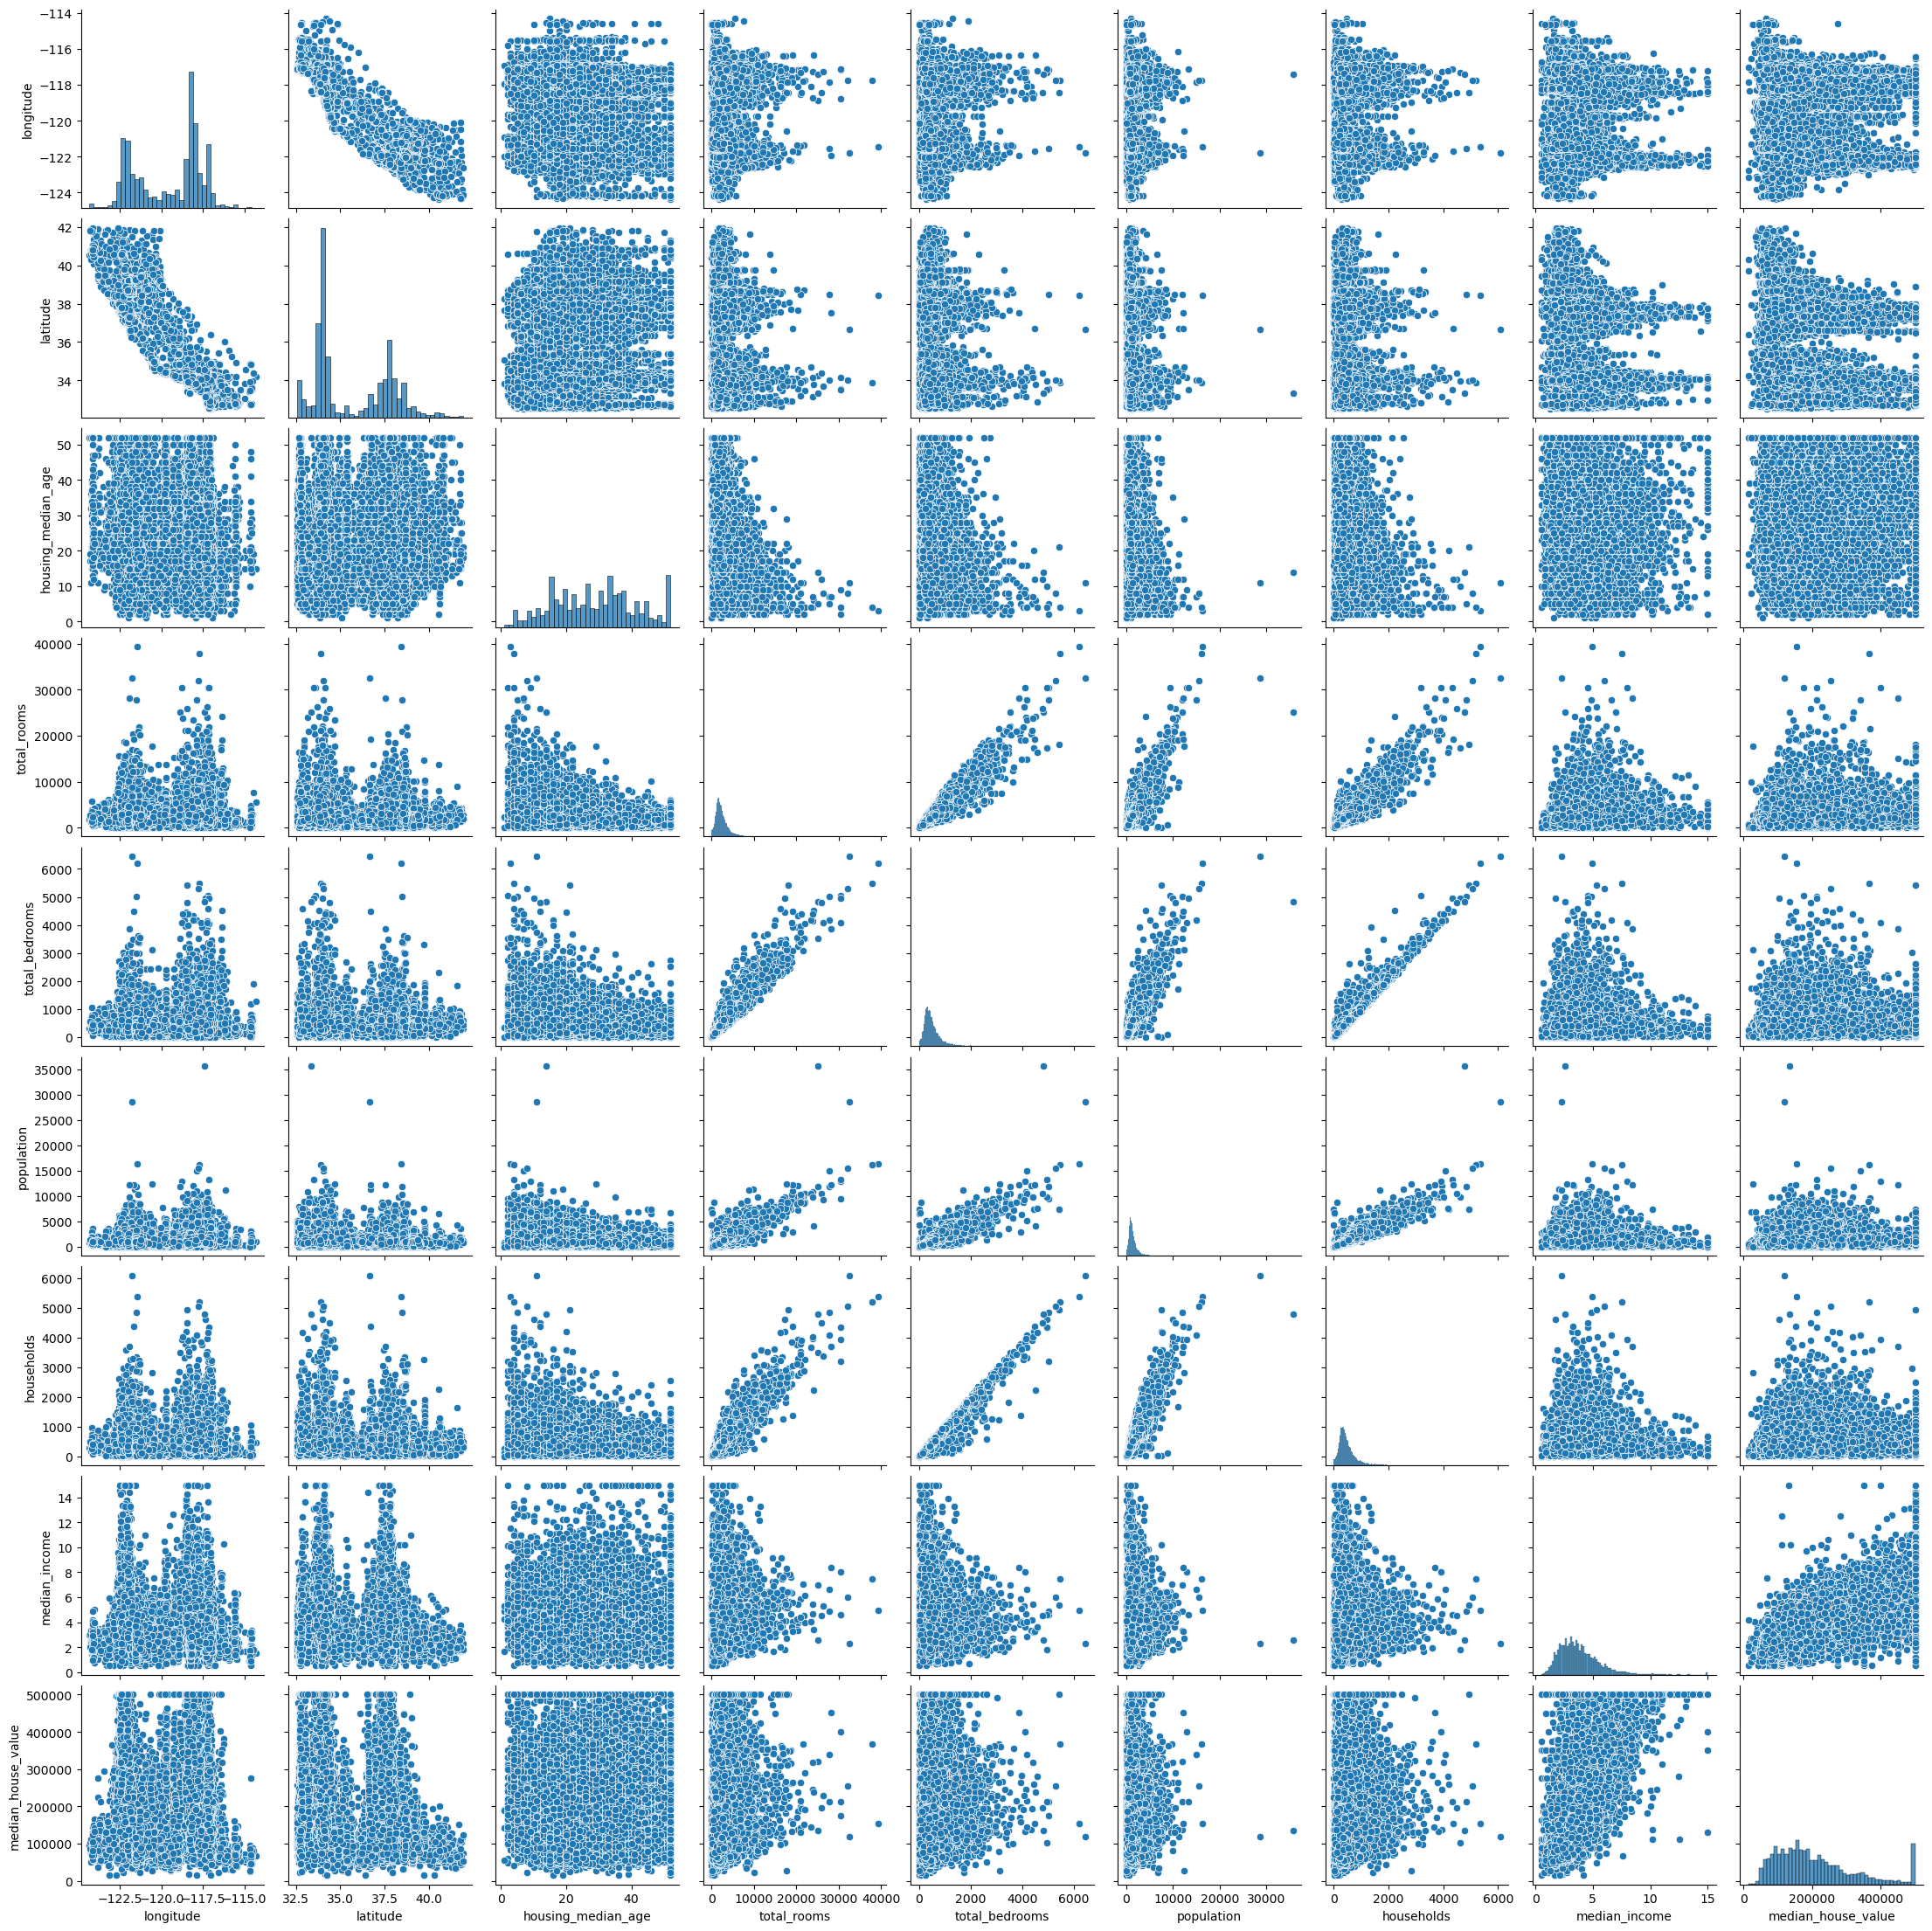

In [18]:
plt.figure(figsize=(12, 5))
sns.pairplot(housing)

In [20]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [27]:
housing.dropna(inplace=True)

In [28]:
X = housing.iloc[:, :-2].values
y = housing.iloc[:,-2].values
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=85, )
X_train.shape

(16346, 8)

### LinearRegression

In [30]:
model = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
print(" intercept : ", model[1].intercept_)
print(" coef : ", model[1].coef_)
y_predict_lr= model.predict(X_test)

 intercept :  206995.88731184343
 coef :  [-85358.07754735 -90080.41656853  14846.39737703 -18909.5039629
  48727.28247845 -41582.91135673  16793.87338575  77224.1534395 ]


In [32]:
print("R2_SCORE: ", metrics.r2_score(y_test, y_predict_lr))
print("MSE : ", metrics.mean_squared_error(y_test, y_predict_lr))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_predict_lr))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict_lr))
math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)) / housing["median_house_value"].mean()

R2_SCORE:  0.6372214920787269
MSE :  4679521767.211818
RMSE:  68407.03010080045
Mean Absolute Error (MAE):  50154.8079829124
MAPE:  0.2984717672268255


0.33068534629724516

In [39]:
ridge_poly_model = make_pipeline(preprocessing.StandardScaler(), 
              preprocessing.PolynomialFeatures(degree=2, include_bias=False), 
              Ridge(alpha=1))
ridge_poly_model.fit(X_train, y_train)
y_predict_ridge_poly = ridge_poly_model.predict(X_test)

In [40]:
print("R2_SCORE: ", metrics.r2_score(y_test, y_predict_ridge_poly))
print("MSE : ", metrics.mean_squared_error(y_test, y_predict_ridge_poly))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict_ridge_poly)))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_predict_ridge_poly))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict_ridge_poly))
math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)) / housing["median_house_value"].mean()

R2_SCORE:  0.6837671519352893
MSE :  4079123938.4758115
RMSE:  63868.019684939434
Mean Absolute Error (MAE):  44885.411807061755
MAPE:  0.25869608119373927


0.33068534629724516

In [44]:
housing.drop(columns='ocean_proximity',  inplace=True)

In [61]:

import numpy as np
from scipy import stats
dfimprove=housing[(np.abs(stats.zscore(housing)) <1).all(axis=1)]

In [62]:
dfimprove.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000
mean,-118.449507,34.297494,30.788095,2003.500142,429.312731,1280.278838,409.844204,3.654505,189481.344346
std,0.804230,0.888245,6.427158,819.563402,175.000956,494.097004,161.175329,0.973848,51188.207131
min,-121.540000,33.510000,17.000000,465.000000,119.000000,306.000000,118.000000,1.972200,91500.000000
25%,-118.430000,33.880000,26.000000,1394.000000,296.000000,892.000000,287.000000,2.862800,154200.000000
50%,-118.180000,34.040000,33.000000,1875.000000,400.000000,1221.000000,385.000000,3.585900,186200.000000
75%,-117.990000,34.210000,36.000000,2536.500000,543.000000,1606.000000,513.000000,4.375000,224250.000000
max,-117.570000,37.760000,41.000000,4763.000000,959.000000,2558.000000,876.000000,5.765200,321900.000000


In [63]:
X = dfimprove.iloc[:, :-1].values
y = dfimprove.iloc[:,-1].values
y

array([266300., 189000., 243100., ..., 146900., 136000., 191400.])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=85, )
X_train.shape

(2808, 8)

### LinearRegression

In [65]:
model = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
print(" intercept : ", model[1].intercept_)
print(" coef : ", model[1].coef_)
y_predict_lr= model.predict(X_test)

 intercept :  188600.67663817704
 coef :  [-17721.10727495 -31173.04890884   1691.50799598  -7578.8067023
  19329.20233452 -29505.53967947  21738.40553077  21434.4654299 ]


In [66]:
print("R2_SCORE: ", metrics.r2_score(y_test, y_predict_lr))
print("MSE : ", metrics.mean_squared_error(y_test, y_predict_lr))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_predict_lr))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict_lr))
math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)) / housing["median_house_value"].mean()

R2_SCORE:  0.5048227439121724
MSE :  1284309502.3382177
RMSE:  35837.26415811087
Mean Absolute Error (MAE):  27477.08929041274
MAPE:  0.15335684785267495


0.17324035396666163

In [74]:
ridge_poly_model = make_pipeline(preprocessing.StandardScaler(), 
              preprocessing.PolynomialFeatures(degree=2, include_bias=False), 
              Ridge(alpha=10))
ridge_poly_model.fit(X_train, y_train)
y_predict_ridge_poly = ridge_poly_model.predict(X_test)

In [76]:
print("R2_SCORE: ", metrics.r2_score(y_test, y_predict_ridge_poly))
print("MSE : ", metrics.mean_squared_error(y_test, y_predict_ridge_poly))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_predict_ridge_poly)))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_predict_ridge_poly))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict_ridge_poly))
math.sqrt(metrics.mean_squared_error(y_test, y_predict_lr)) / housing["median_house_value"].mean()

R2_SCORE:  0.5419931259125357
MSE :  1187903065.6093452
RMSE:  34465.96967458402
Mean Absolute Error (MAE):  26139.639476983426
MAPE:  0.14712257189049052


0.17324035396666163